# CAPM
***

THE BASICS
This model focuses on risk by distunguishing risk into Systematic Risk and Unsystematic Risk. <br> The only relevant risk is Systematic risk aka *Beta*.

Terminology
Systematic Risk - The portion of risk which cannot be reduced by diversification.<br>
Unsystematic Risk - The portion of risk specific to each stock which can be reduced by diversification.


Expected return is the risk free rate plus market premium.
> Risk free rate (Bond, T-Bill)
> Premium is the Beta adjusted market return 

Beta is the measure of a stock's volitility (risk) relative to market's volitility (risk).
Alpha is additional return / excess return beyond expected return.

Key concept:
> Beta = 1 stock's risk is the same as the market's risk<br>
Beta > 1 stock's risk is higher than the market's risk<br>
Beta < 1 stock's risk is lower than the markets's risk

Calculated as 
Beta = Covariance(asset returns with market returns) / Variance(market returns)

NB! Beta of a portfolio is a linear combination of weighted beta value.<br>
As it is linear, ordinary least square linear regression method can be used for calculating a profolio's beta.

Alpha = expected return less CAPM.

NB!It is favourable to use monthly returns to ensure that returns are approximately normally distributed.

# Coding the Theory - A practical example

### Get time series data 
***
###### I chose Quandl to get data from for stocks that interest me -> https://www.quandl.com/ <- you must register to get your secret_key
###### if you dont have the quandl library then use this in your cmd "pip install quandl"

In [1]:
# Using Quandl Library to draw data from their API
import quandl
quandl.ApiConfig.api_key = "Secret"

# Import data utility libraries
import pandas as pd
import numpy as np
from datetime import date

# Import visualisation library
import matplotlib.pyplot as plt
#For using matplotlibs inline backend displaying and retaining plat in the frontend notebook
%matplotlib inline 

In [2]:
# 2019 US Risk free rate
rf = 0.03

#Select stock
stocks = ["NFLX","NVDA", "XOM", "IBM"]
stocks.sort()
stocks

['IBM', 'NFLX', 'NVDA', 'XOM']

In [3]:
# Building a dataframe with Inflation adjusted S&P500 monthly prices
spy_data = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH", authtoken="Secret")

# Building a dataframe with the following stocks (Netflix, Nvidia, Exxon Mobil, IBM)
stock_data = quandl.get_table("WIKI/PRICES", ticker = stocks, date={'gte':'2010-04-01', 'lte':'2020-03-31'}, paginate=True)

In [4]:
#Checking S&P data
spy_data['2017-07-01':'2018-01-01']

,Value
Date,
2017-07-01,2454.10
2017-08-01,2456.22
2017-09-01,2492.84
2017-10-01,2557.00
2017-11-01,2593.61
2017-12-01,2664.34
2018-01-01,2789.80


In [5]:
#Checking stocks data
stock_data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,XOM,2018-03-27,74.00,74.8949,73.2750,73.70,14625541.0,0.0,1.0,74.00,74.8949,73.2750,73.70,14625541.0
1,XOM,2018-03-26,73.65,74.1500,72.7548,74.00,14894438.0,0.0,1.0,73.65,74.1500,72.7548,74.00,14894438.0
2,XOM,2018-03-23,73.81,74.2100,72.6700,72.89,19069634.0,0.0,1.0,73.81,74.2100,72.6700,72.89,19069634.0
3,XOM,2018-03-22,74.42,74.7000,73.3900,73.50,17118037.0,0.0,1.0,74.42,74.7000,73.3900,73.50,17118037.0
4,XOM,2018-03-21,74.23,75.6400,73.9800,75.04,14813757.0,0.0,1.0,74.23,75.6400,73.9800,75.04,14813757.0


### Wrangle the data
***
###### Be mindful of assigning specific data to unique variable names so you can preserve that data for later use.

In [6]:
# Extract and pivot the adjusted closing prices for each stock 

df = stock_data.pivot(index='date', columns='ticker', values='adj_close')


# NB! the data only returns to 31 March 2018 which is less than the 10 years of our original call

df.head()

ticker,IBM,NFLX,NVDA,XOM
date,,,,
2010-04-01,105.116266,10.714286,15.978432,53.691934
2010-04-05,106.017848,11.427143,16.219686,54.152536
2010-04-06,105.673607,11.910000,15.820690,53.922235
2010-04-07,105.304778,11.390000,15.922758,53.477516
2010-04-08,104.591709,11.690000,15.662947,53.890469


In [7]:
# Merging both dataframes and then calculating log returns
df_m = df.merge(spy_data, left_index=True, right_index=True, how='right')
df_m.dropna(axis=0, inplace=True)
df_m_returns = df_m.pct_change().apply(lambda x : np.log(x+1))

#Removing rows without usable data
df_m_returns.dropna(axis=0, inplace=True)

#Renaming the S&P column
df_m_returns.rename(columns={"Value" : "S&P"}, inplace=True)

#Checking data
df_m_returns.head()

,IBM,NFLX,NVDA,XOM,S&P
Date,,,,,
2010-06-01,-0.025730,0.358047,-0.313963,-0.125187,-0.100018
2010-07-01,-0.014337,0.021849,-0.192227,-0.045580,-0.003291
2010-09-01,0.030755,0.207260,-0.099065,0.080471,0.038408
2010-10-01,0.075549,0.136584,0.188402,0.026409,0.043169
2010-11-01,0.055076,0.078978,0.059017,0.068140,0.023043


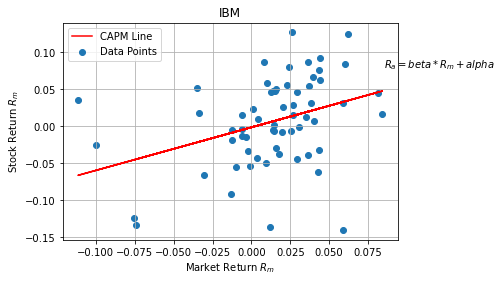

The beta value from the equation for IBM is 0.582.
The beta value from regression for IBM is 0.582.
The expected return for IBM is 10.43%.




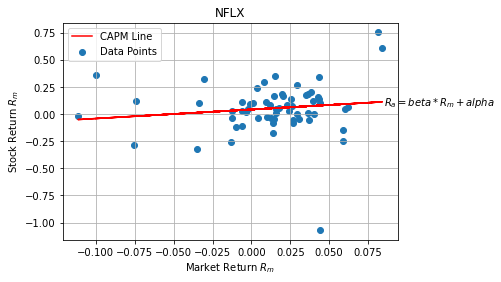

The beta value from the equation for NFLX is 0.833.
The beta value from regression for NFLX is 0.833.
The expected return for NFLX is 13.62%.




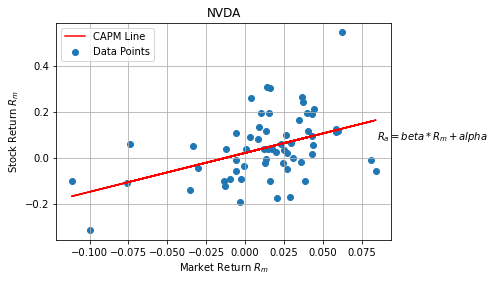

The beta value from the equation for NVDA is 1.689.
The beta value from regression for NVDA is 1.689.
The expected return for NVDA is 24.55%.




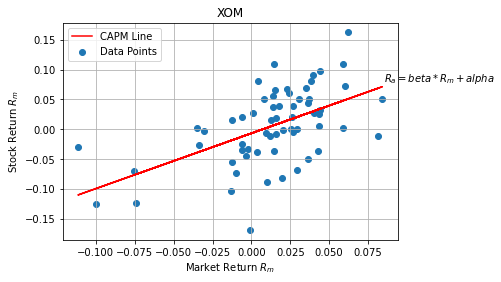

The beta value from the equation for XOM is 0.928.
The beta value from regression for XOM is 0.928.
The expected return for XOM is 14.84%.




In [8]:
#Building 3 empty lists two for beta values from the formula and regression calculation methods and one for expected returns
betaFs = []
betaRs = []
exp_returns = []

#Looping over each stock to calculate beta value and expected return with associated plot and results
for i in stocks:
    
    covmat = np.cov(df_m_returns[i],df_m_returns['S&P'])
    betaF = covmat[0,1]/covmat[1,1]
    betaFs.append(betaF)
    betaR,alpha = np.polyfit(df_m_returns['S&P'],df_m_returns[i], deg=1)
    betaRs.append(betaR)
    fig,axis = plt.subplots(1,figsize=(6,4))
    axis.scatter(df_m_returns['S&P'],df_m_returns[i], label="Data Points")
    axis.plot(df_m_returns['S&P'],betaR*df_m_returns['S&P'] + alpha, color='red', label="CAPM Line")
    plt.title(i)
    plt.xlabel('Market Return $R_m$', fontsize=10)
    plt.ylabel('Stock Return $R_m$')
    plt.text(0.085, 0.08, r'$R_a = beta * R_m + alpha$', fontsize=10)
    plt.legend()
    plt.grid(True)
    plt.show()
    expected_return = rf + betaF*((df_m_returns['S&P'].mean()*12)-rf)
    exp_returns.append(expected_return)
    
    print('The beta value from the equation for {} is {}.'.format(i,round(betaF,3)))
    print('The beta value from regression for {} is {}.'.format(i,round(betaR,3)))
    print('The expected return for {} is {}%.'.format(i,round(expected_return*100,2)))
    print('\n')
    